# Data Augmentation

## Imports

In [78]:
# import the necessary packages
from albumentations.pytorch import ToTensorV2
from imutils import paths
from skimage import io
from torch.utils.data import Dataset
from torchvision import transforms

import albumentations as A
import albumentations.augmentations.functional as F
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
import torchvision.transforms.functional as TF

## Load data

In [79]:
# load the image and mask filepaths in a sorted manner
imagePaths = sorted(list(paths.list_images("/data/jantina/CoralNet/dataset/images")))
maskPaths = sorted(list(paths.list_images("/data/jantina/CoralNet/dataset/labels")))

In [80]:
# grab the paths from the current index
imagePath = imagePaths[0]
maskPath = maskPaths[0]
# load the image and mask from disk
image = io.imread(imagePath)
mask = io.imread(maskPath)

## Define augmentations

## Visualize

In [81]:
# new label classes
classes = {0: 'hard coral',
           1: 'hard coral bleached',
           2: 'dead coral',
           3: 'other invertebrates',
           4: 'sand/rubble',
           5: 'other',
           6: 'algae',
           7: 'unknown',
           8: 'no label'
          }

In [82]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask, cmap = plt.cm.get_cmap('tab20', 9), vmin=0, vmax=8)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask, cmap = plt.cm.get_cmap('tab20', 9), vmin=0, vmax=8)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [83]:
aug = A.Compose([
    A.RandomResizedCrop(width=128, height=128, scale=(0.08, 1.0), ratio=(0.75, 1.33)),    
    A.HorizontalFlip(p=0.5),              
    A.RandomRotate90(p=0.5),
    #A.OpticalDistortion(distort_limit=2, shift_limit=0.5, p=0.5),
    A.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1, p=0.5),
    A.GaussianBlur(blur_limit=(3, 7), sigma_limit=0, always_apply=False, p=0.5),
    A.CLAHE(p=0.8),
    A.RandomBrightnessContrast(p=0.8),    
    A.RandomGamma(p=0.8),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    #ToTensorV2()
])

random.seed(11)
augmented = aug(image=image, mask=mask)

image_heavy = augmented['image']
mask_heavy = augmented['mask']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


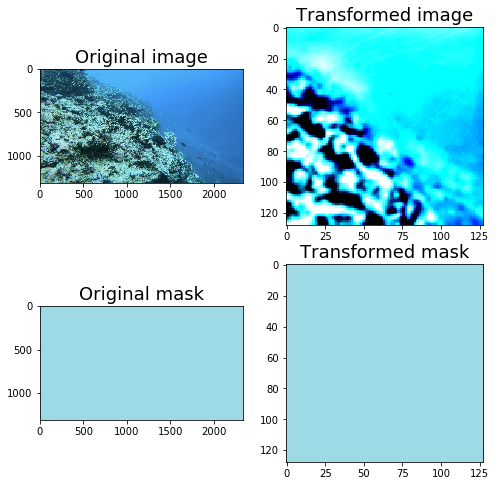

In [84]:
visualize(image_heavy, mask_heavy, original_image=image, original_mask=mask)